In [2]:
#Import some libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset , DataLoader  , random_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# There's only one file above...we'll select it.
train_df=pd.read_csv('/kaggle/input/expresso-zindi-dataset/UmojaHack/Train.csv')
test_df=pd.read_csv('/kaggle/input/expresso-zindi-dataset/UmojaHack/Test.csv')

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

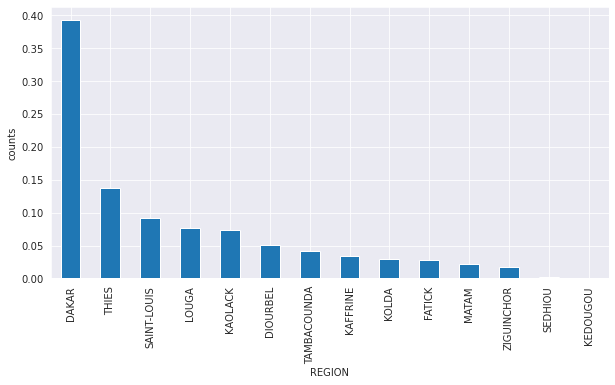

In [5]:
print(train_df['REGION'].value_counts())
plt.figure(figsize=(10,5))
train_df['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

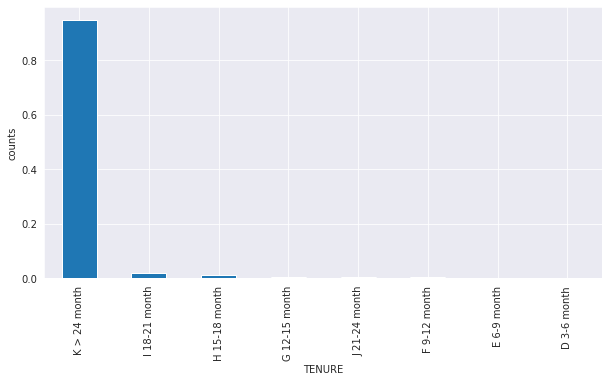

In [6]:
print(train_df['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train_df['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

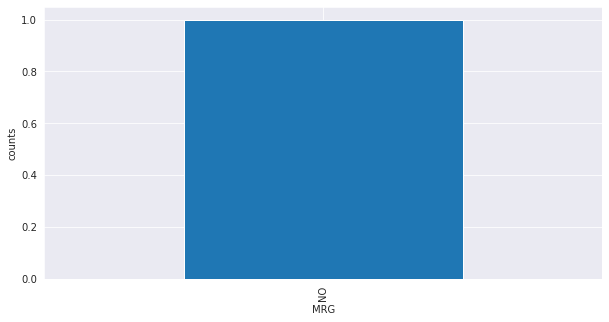

In [7]:
print(train_df['MRG'].value_counts())
plt.figure(figsize=(10,5))
train_df['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
Package3_Monthly                       1
pilot_offer5                           1
Postpaid FORFAIT 10H Package           1
SMS Max                                1
FIFA_TS_weekly                         1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

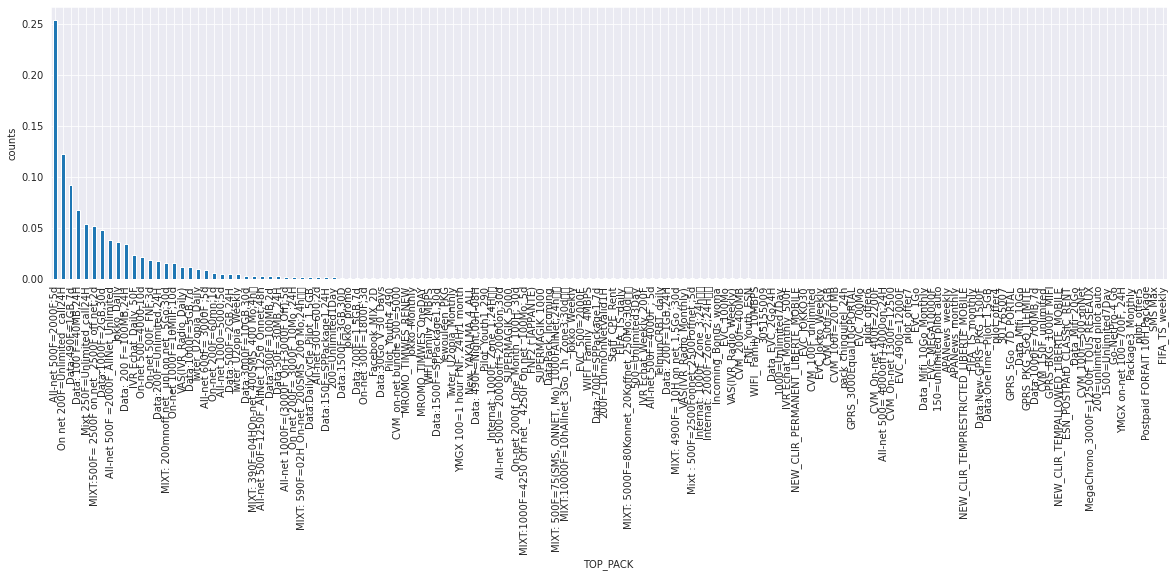

In [8]:
#probaly not the best way to visualize this
print(train_df['TOP_PACK'].value_counts())
plt.figure(figsize=(20,5))
train_df['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

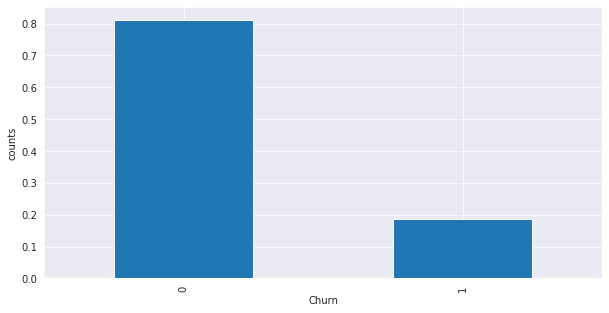

In [9]:
#Check if the predictor class is balanced 
print(train_df['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train_df['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

### model improvement.. explore randomOversampling or Undersampling

In [10]:
train_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [11]:
#Check summary of numerical fields
train_df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [12]:
#Check for missing values in training data
train_df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [13]:
#Check for missing values in test data
test_df.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [14]:
#drop 'REGION', 'MRG', 'TOP_PACK' columns in train df
train_df.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [15]:
#check lenght or train dataframe
len(train_df.columns)

16

In [16]:
#drop 'REGION', 'MRG', 'TOP_PACK' columns in test df
test_df.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [17]:
#check lenght or test dataframe
len(test_df.columns)

15

In [18]:
train = train_df
test = test_df

In [19]:
#fill_nans
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [20]:
#check for nans
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [21]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [22]:
#check for nans
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   ARPU_SEGMENT    float64
 6   FREQUENCE       float64
 7   DATA_VOLUME     float64
 8   ON_NET          float64
 9   ORANGE          float64
 10  TIGO            float64
 11  ZONE1           float64
 12  ZONE2           float64
 13  REGULARITY      int64  
 14  FREQ_TOP_PACK   float64
 15  CHURN           int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 262.9+ MB


In [25]:
train_df.head(2)

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,1.000000,2.000000,54,8.000000,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,8.170132,7.553309,4,9.272461,1


In [26]:
train.index = train['user_id']
test.index = test['user_id']

In [27]:
test.head(1)

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
user_id,,,,,,,,,,,,,,,
00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,3346.095454,378.0,11.0,5.0,8.164663,7.6553,42,5.0


In [28]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)

In [29]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [30]:
my_scaler = MinMaxScaler()   #StandardScaler()
train[num_cols] = my_scaler.fit_transform(train[num_cols])
test[num_cols] = my_scaler.transform(test[num_cols])

In [31]:
encoder = LabelEncoder()
train["TENURE"] = encoder.fit_transform(train["TENURE"])
test["TENURE"] = encoder.fit_transform(test["TENURE"])

In [32]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN'].astype('category')
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) 

In [36]:
#create tensors
X = torch.tensor(x.to_numpy(), dtype=torch.float32)
y = torch.tensor(y.to_numpy() , dtype=torch.float32)
submit_ = torch.tensor(test.to_numpy() , dtype=torch.float32)

In [37]:
#tensor  train dataset
train_ds = TensorDataset(X , y)

In [38]:
#set random seed for reproducibility
random_seed = 42
torch.manual_seed(random_seed);

In [40]:
#perform random split , set batch size , create train  validation and hold data loaders
train_ , val_, hold_ = random_split(train_ds , [ 1300000 , 600600 , 253448]) 

chosen_batch = 3000
train_dl = DataLoader(train_ ,chosen_batch  , shuffle = True)
val_dl = DataLoader(val_ ,chosen_batch)
hold_dl = DataLoader(hold_ ,chosen_batch)

In [42]:
#inspect train data loadder batches
for xb, yb in train_dl:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[7.0000e+00, 4.2341e-03, 2.2727e-02,  ..., 2.0431e-03, 6.0656e-01,
         1.4045e-03],
        [7.0000e+00, 4.0426e-04, 0.0000e+00,  ..., 2.0431e-03, 1.6393e-01,
         1.1619e-02],
        [7.0000e+00, 4.6597e-03, 3.0303e-02,  ..., 2.0431e-03, 4.0984e-01,
         0.0000e+00],
        ...,
        [7.0000e+00, 1.1749e-02, 7.9766e-02,  ..., 2.0431e-03, 6.5574e-02,
         1.1619e-02],
        [7.0000e+00, 1.2553e-03, 0.0000e+00,  ..., 2.0431e-03, 0.0000e+00,
         1.1619e-02],
        [7.0000e+00, 2.1064e-03, 7.5758e-03,  ..., 2.0431e-03, 3.4426e-01,
         1.1619e-02]])
targets: tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [43]:
#set input and output size
input_size = 14
output_size = 1

In [44]:
#define loss function
loss_func= nn.BCELoss()

In [69]:
#define accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [70]:
#network architecture
class Expresschurner(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear =nn.Linear(input_size, output_size)

        
    def forward(self, xb):
        out = torch.sigmoid(self.linear(xb))             
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = loss_func(out , targets)                     
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss =  loss_func(out , targets)
#         return {'val_loss': loss.detach()}
        acc = accuracy(out, targets)         
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
#         return {'val_loss': epoch_loss.item()}
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
#             print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [113]:
#initialize model arch

base_model = Expresschurner()

In [114]:
#check current model weights
list(base_model.parameters())

[Parameter containing:
 tensor([[-0.0892,  0.2282,  0.1703,  0.0971, -0.1577,  0.2391,  0.1817, -0.1497,
           0.1527,  0.0247, -0.0317, -0.1623, -0.0774, -0.2080]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.2515], requires_grad=True)]

In [82]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [115]:
result = evaluate(base_model , val_dl) 
print(result)

{'val_loss': 0.5112448334693909, 'val_acc': 0.8118289709091187}


In [116]:
#test model on on hold_dl to see model performance before training

from sklearn.metrics import log_loss
base_model.eval()
for i , e in hold_dl:
    x =  base_model(i)
    print(log_loss(e.unsqueeze(1) , x.detach() ))

0.5121592009166877
0.5200118184387684
0.5128173264761766
0.5096933339734873
0.5152732476790746
0.5107923865020275
0.5112160366773605
0.5115363377928733
0.5088016869525115
0.5183391025165717
0.5215992892384529
0.5105843370854855
0.5099299082954725
0.5237760421335698
0.5004902844925722
0.5154290432929993
0.5110894634524982
0.5132398489514987
0.5020620154241721
0.5111319637000561
0.5199191800951958
0.5180639409621557
0.5187528453965982
0.5102011488775412
0.5053319107393424
0.5139076048930487
0.5125846382876237
0.510689468195041
0.5131405296425025
0.49088119570414224
0.5017896936833859
0.5052534072101116
0.509577383329471
0.516871063053608
0.5134067268371582
0.5206158431371053
0.5081134217182796
0.5144881835281849
0.5069921633998553
0.5037610979576905
0.5124578993618488
0.4959803714454174
0.5097115907371044
0.5144903254906337
0.5095875319838524
0.5076336430609226
0.5153052946229776
0.5089956467648348
0.5172334657112757
0.49919770535826685
0.5115595682660738
0.5179801857372125
0.52342402631

In [88]:
epochs = 40
lr =  0.186

history1 = fit(40, lr, base_model, train_dl, val_dl, torch.optim.SGD) 

Epoch [19], val_loss: 0.3134, val_acc: 0.8118
Epoch [39], val_loss: 0.3121, val_acc: 0.8118


In [90]:
#save model checkpoint
torch.save(base_model.state_dict(), 'm13.pth')

In [91]:
#load model architechture
model  = Expresschurner()

In [92]:
#Reload model state dict into arch
model.load_state_dict(torch.load('./m13.pth'))
model.eval()

Expresschurner(
  (linear): Linear(in_features=14, out_features=1, bias=True)
)

In [96]:
def plot_accuracies(history):
    accuracies = [x['val_loss'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

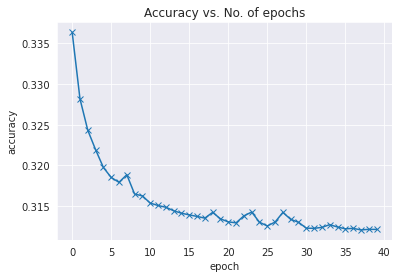

In [97]:
plot_accuracies(history1)

In [98]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

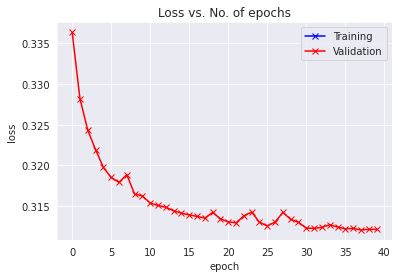

In [99]:
plot_losses(history1)

In [117]:
result = evaluate(model , hold_dl) 
print(result)

{'val_loss': 0.31140169501304626, 'val_acc': 0.8121141195297241}


In [118]:
#test on hold_dl to see model performance after training
from sklearn.metrics import log_loss
model.eval()
for i , e in hold_dl:
    x = model(i)
    print(log_loss(e.unsqueeze(1) , x.detach() ))
base_model.train()

0.3127257150388808
0.30457998280778215
0.3156788184621449
0.3034917194720959
0.29770517418422
0.30917930602865334
0.32164613582459667
0.32726214112099844
0.28982665973434146
0.3256340039233619
0.3094990367364177
0.3145717943168905
0.30820876047657414
0.32971098452406783
0.29615813819892356
0.33909323796991764
0.31103309294137094
0.29411087474257025
0.2978223920291833
0.3035715560725463
0.3275426500083025
0.32724979478520494
0.30590353295057626
0.3148235492186601
0.3061150726133395
0.311910537925772
0.3157807824924821
0.30050582755555905
0.3217891058838383
0.3001248936552438
0.29768078104714124
0.31224845262998135
0.3070086538687853
0.32047668200800156
0.30517689764196015
0.326890447863203
0.3052025063938539
0.31594892972364325
0.3047064432722497
0.2991983218705573
0.3073920086658812
0.29867793144567983
0.2991459756392869
0.30770105444845586
0.30225966828134065
0.3256864941975509
0.32499735811462355
0.3129100900629904
0.3063249240402074
0.2996334587389817
0.31889084145164814
0.308078464

Expresschurner(
  (linear): Linear(in_features=14, out_features=1, bias=True)
)

In [105]:
su= pd.read_csv('../input/expresso-zindi-dataset/UmojaHack/SampleSubmission.csv')

In [107]:
# evaluate the model
def predictor_model(test_dl, model):
    
    predictions = list()
        #for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(test_dl)
    # retrieve numpy array
    yhat = yhat.detach().numpy()

    # reshape for stacking
    yhat = yhat.reshape((len(yhat), 1))
    # store
    predictions.append(yhat)
    predictions = np.vstack(predictions)

    su['CHURN'] = predictions
    return su

In [119]:
predictor_model(submit_ , model)

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.005599
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.006654
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.003311
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.359771
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.331857
...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,0.001749
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,0.601363
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,0.170108
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,0.074414


In [120]:
su.to_csv('ESDm14.csv' , index = False)

In [122]:
#!pip install jovian --upgrade --quiet

#import jovian
#Save notebook current version to jovian
jovian.commit(project = 'Express-churner')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/troublem1/Express-churner


<IPython.core.display.Javascript object>